In [1]:
from pdfminer.high_level import extract_text
from pdfminer.pdfpage import PDFPage

ruta_pdf = "../Manuales/Manual de Turbina TG-1 Kallpa.pdf"

# Obtener cantidad total de páginas
with open(ruta_pdf, "rb") as f:
    total_paginas = len(list(PDFPage.get_pages(f)))

# Crear rango desde página 21 (índice 20)
rango_paginas = range(20, total_paginas)

# Extraer texto desde página 21 en adelante
texto = extract_text(ruta_pdf, page_numbers=rango_paginas)

# Guardar en archivo
with open("manual_desde_pagina_21.txt", "w", encoding="utf-8") as f:
    f.write(texto)


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def tokenize(text, isRAG=False):
    # 1. Minúsculas
    raw_text = text.lower()

    # 2. Eliminar caracteres no alfabéticos 
    text = re.sub(r'[^a-z0-9\s.,]', '', raw_text) if isRAG else re.sub(r'[^a-z\s]', '', raw_text)  
    text = re.sub(r'\.{2,}', ' ', text)
    # 3. Tokenización
    tokens = word_tokenize(text)
    if(not isRAG):

        # 4. Eliminar stopwords
        stop_words = set(stopwords.words("english"))
        tokens = [word for word in tokens if word not in stop_words]

        # 5. Lematización
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

tokens = tokenize(texto)
tokens[:50]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['plant',
 'description',
 'introduction',
 'vendor',
 'literature',
 'il',
 'combustion',
 'turbine',
 'generator',
 'convert',
 'fuel',
 'electrical',
 'energy',
 'combustion',
 'turbine',
 'generator',
 'primary',
 'auxiliary',
 'econopac',
 'collectively',
 'referred',
 'econopac',
 'power',
 'plant',
 'designed',
 'minimize',
 'site',
 'construction',
 'combustion',
 'turbine',
 'generator',
 'auxiliary',
 'module',
 'factoryassembled',
 'maximum',
 'extent',
 'possible',
 'based',
 'shipping',
 'limitation',
 'equipment',
 'layout',
 'plant',
 'prearranged',
 'reduce',
 'design',
 'effort',
 'maximize',
 'standardization',
 'equipment']

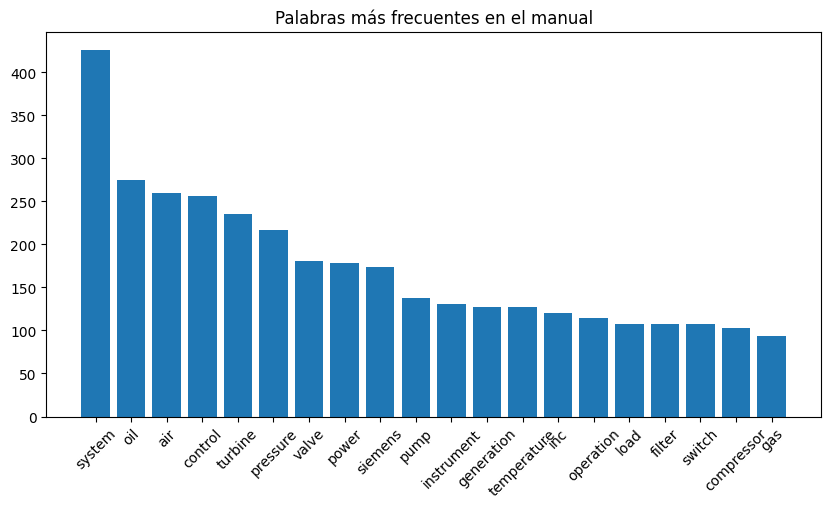

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar palabras
contador = Counter(tokens)
palabras_comunes = contador.most_common(20)

# Graficar
palabras, frecuencias = zip(*palabras_comunes)
plt.figure(figsize=(10, 5))
plt.bar(palabras, frecuencias)
plt.xticks(rotation=45)
plt.title("Palabras más frecuentes en el manual")
plt.show()

### Analisis de varios Manuales 

In [30]:
boundaries = {"PD-0100-0001_Rev_m.pdf": [6,72],"sd31_manual.pdf":[4,64], "MANUAL Y USO DE BOMBAS OBL SERIE R.pdf":[9,72],"7.5 RO FOULING substance (anaysis solution).pdf":[1,48],"Manual de Turbina TG-1 Kallpa.pdf":[21,282],"SB4-18-0104-GT-EN-01.pdf":[3,60],"SB4-19-0009-GT-EN-01.pdf":[3,4],"SB5-08-0021-GT-EN-01.pdf":[3,6],"SB4-17-0022-GT-EN-01.pdf":[3,3],"SB4-14-0055-GT-EN-01.pdf":[3,7]}

In [31]:
import os
titulos = []
contenido = []

carpeta_pdfs = "../Manuales" 

# Lista para guardar los textos
corpus = []

for archivo in os.listdir(carpeta_pdfs):
    if archivo.endswith(".pdf"):
        ruta_pdf = os.path.join(carpeta_pdfs, archivo)
        print(f"Leyendo: {ruta_pdf}")
        try:
            boundary = boundaries.get(archivo)
            rango_paginas = range(boundary[0], boundary[1])
            texto = extract_text(ruta_pdf, page_numbers=rango_paginas)
            titulos.append(archivo)
            contenido.append(texto)

        except Exception as e:
            print(f"Error al leer {archivo}: {e}")



Leyendo: ../Manuales\7.5 RO FOULING substance (anaysis solution).pdf
Leyendo: ../Manuales\Manual de Turbina TG-1 Kallpa.pdf
Leyendo: ../Manuales\MANUAL Y USO DE BOMBAS OBL SERIE R.pdf
Leyendo: ../Manuales\PD-0100-0001_Rev_m.pdf


The PDF <_io.BufferedReader name='../Manuales\\SB4-14-0055-GT-EN-01.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case
The PDF <_io.BufferedReader name='../Manuales\\SB4-17-0022-GT-EN-01.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case


Leyendo: ../Manuales\SB4-14-0055-GT-EN-01.pdf
Leyendo: ../Manuales\SB4-17-0022-GT-EN-01.pdf


The PDF <_io.BufferedReader name='../Manuales\\SB4-18-0104-GT-EN-01.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case


Leyendo: ../Manuales\SB4-18-0104-GT-EN-01.pdf


The PDF <_io.BufferedReader name='../Manuales\\SB4-19-0009-GT-EN-01.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case
The PDF <_io.BufferedReader name='../Manuales\\sd31_manual.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding. Use the check_extractable if you want to raise an error in this case


Leyendo: ../Manuales\SB4-19-0009-GT-EN-01.pdf
Leyendo: ../Manuales\SB5-08-0021-GT-EN-01.pdf
Leyendo: ../Manuales\SB5-12-0042-BP-EN-01.pdf
Error al leer SB5-12-0042-BP-EN-01.pdf: 'NoneType' object is not subscriptable
Leyendo: ../Manuales\sd31_manual.pdf


In [34]:
import pandas as pd

df = pd.DataFrame({
    "titulo": titulos,
    "contenido": contenido
})

# Ver las primeras filas
df.head(10)

,titulo,contenido
0,7.5 RO FOULING substance (anaysis solution).pdf,"Seawater \nSeawater with TDS of 35,000 mg/L is..."
1,Manual de Turbina TG-1 Kallpa.pdf,Siemens Confidential \n\nPLANT DESCRIPTION\n\n...
2,MANUAL Y USO DE BOMBAS OBL SERIE R.pdf,4 REGULATORY FRAMEWORK \n\nThe information ...
3,PD-0100-0001_Rev_m.pdf,HOGEN® S Series 2 Hydrogen Generator \nInstall...
4,SB4-14-0055-GT-EN-01.pdf,Service Bulletin: SB4-14-0055-GT-EN-01 \nTitle...
5,SB4-17-0022-GT-EN-01.pdf,Gas Turbine – SB4-17-0022-GT-EN-01\n\nService ...
6,SB4-18-0104-GT-EN-01.pdf,Service Bulletin: SB4-18-0104-GT-EN-01\n\nNove...
7,SB4-19-0009-GT-EN-01.pdf,Service Bulletin: SB4-19-0009-GT-EN-01 \n\nMar...
8,SB5-08-0021-GT-EN-01.pdf,Service Bulletin: SB5-08-0021-GT-EN-01 \n\nTit...
9,sd31_manual.pdf,These settings should be recorded for future r...


In [35]:
df["tokens"]= df["contenido"].apply(tokenize)
df["tokens"]

0    [seawater, seawater, tds, mgl, considered, sta...
1    [siemens, confidential, plant, description, pi...
2    [regulatory, framework, information, annex, le...
3    [hogen, series, hydrogen, generator, installat...
4    [service, bulletin, sbgten, title, compressor,...
5    [gas, turbine, sbgten, service, bulletin, dlnu...
6    [service, bulletin, sbgten, november, title, g...
7    [service, bulletin, sbgten, march, title, gas,...
8    [service, bulletin, sbgten, title, response, n...
9    [setting, recorded, future, refer, ence, setti...
Name: tokens, dtype: object

# Generacion un corpus para analizar los documentos


In [36]:
# Creamos nuestro diccionario de palabras
import gensim
# Creamos diccionario
dictionary = gensim.corpora.Dictionary(df['tokens'])
print("Tamaño inicial del diccionario:", len(dictionary))
# Filtramos palabras raras o muy frecuentes
dictionary.filter_extremes(no_below=1, no_above=0.8, keep_n=100000)
print("Tamaño después del filtro:", len(dictionary))


Tamaño inicial del diccionario: 6560
Tamaño después del filtro: 6541


In [37]:
# Creamos el corpus para bow
corpus_bow = [dictionary.doc2bow(tokens) for tokens in df['tokens']]
count = 0
# where 'k' represents the word (key), and 'v' represents the corresponding integer ID (value).
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break


0 ability
1 able
2 absence
3 absolute
4 absorbed
5 acc
6 acceleration
7 accept
8 acceptable
9 accomplished
10 according


In [38]:
corpus_bow[0]

[(0, 2),
 (1, 1),
 (2, 3),
 (3, 4),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 2),
 (10, 5),
 (11, 4),
 (12, 1),
 (13, 1),
 (14, 2),
 (15, 5),
 (16, 1),
 (17, 3),
 (18, 4),
 (19, 62),
 (20, 6),
 (21, 5),
 (22, 4),
 (23, 1),
 (24, 2),
 (25, 1),
 (26, 2),
 (27, 2),
 (28, 3),
 (29, 6),
 (30, 6),
 (31, 11),
 (32, 3),
 (33, 1),
 (34, 11),
 (35, 12),
 (36, 23),
 (37, 3),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 2),
 (42, 1),
 (43, 1),
 (44, 4),
 (45, 27),
 (46, 1),
 (47, 1),
 (48, 3),
 (49, 3),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 3),
 (55, 1),
 (56, 1),
 (57, 20),
 (58, 1),
 (59, 2),
 (60, 2),
 (61, 1),
 (62, 15),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 10),
 (67, 1),
 (68, 5),
 (69, 10),
 (70, 2),
 (71, 1),
 (72, 5),
 (73, 1),
 (74, 18),
 (75, 1),
 (76, 7),
 (77, 4),
 (78, 3),
 (79, 6),
 (80, 3),
 (81, 1),
 (82, 4),
 (83, 1),
 (84, 3),
 (85, 1),
 (86, 2),
 (87, 2),
 (88, 48),
 (89, 2),
 (90, 1),
 (91, 2),
 (92, 2),
 (93, 43),
 (94, 2),
 (95, 2),
 (96, 5),
 (97, 5),
 (98, 15),
 (99, 

In [39]:
# Creamos el corpus para TF-IDF
from gensim import models
tfidf = models.TfidfModel(corpus_bow)
corpus_tfidf = tfidf[corpus_bow]

In [40]:
from collections import defaultdict

# Acumulador de pesos y conteos
tfidf_acumulado = defaultdict(float)
conteo = defaultdict(int)

# Recorrer todos los documentos del corpus
for doc in corpus_tfidf:
    for palabra_id, peso in doc:
        tfidf_acumulado[palabra_id] += peso
        conteo[palabra_id] += 1

# Calcular promedio TF-IDF por palabra
tfidf_promedio = {dictionary[pid]: tfidf_acumulado[pid] / conteo[pid] for pid in tfidf_acumulado}

# Mostrar las 20 palabras más relevantes
for palabra, peso in sorted(tfidf_promedio.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{palabra}: {peso:.4f}")

fogging: 0.6103
hogen: 0.5115
obl: 0.3884
advisory: 0.3701
ph: 0.3509
burner: 0.3400
dlnuln: 0.3400
lean: 0.3392
instrument: 0.3289
sd: 0.3187
plunger: 0.2994
mx: 0.2913
pwd: 0.2648
generator: 0.2615
mgl: 0.2609
ss: 0.2600
rw: 0.2583
nerc: 0.2467
erosion: 0.2441
chlorine: 0.2429


### Embedding RAG

In [41]:
df["texto_limpio"] = df["contenido"].apply(lambda x: " ".join(tokenize(x,True)))

In [42]:
df["texto_limpio"] 

0    seawater seawater with tds of 35,000 mgl is co...
1    siemens confidential plant description pipe ra...
2    4 regulatory framework the information in anne...
3    hogen s series 2 hydrogen generator installati...
4    service bulletin sb4140055gten01 title compres...
5    gas turbine sb4170022gten01 service bulletin d...
6    service bulletin sb4180104gten01 november 28 ,...
7    service bulletin sb4190009gten01 march 27 , 20...
8    service bulletin sb5080021gten01 title respons...
9    these settings should be recorded for future r...
Name: texto_limpio, dtype: object

In [43]:
def chunk_text(text, max_words=200):
    words = text.split()
    return [" ".join(words[i:i+max_words]) for i in range(0, len(words), max_words)]

chunks_total = []
for doc in df["texto_limpio"]:
    chunks_total.extend(chunk_text(doc, max_words=200))
chunks_total

['seawater seawater with tds of 35,000 mgl is considered standard seawater constituting , by far , the largest amount of water worldwide . the composition is nearly the same all over the world . the actual tds content may , however , vary within wide limits from the baltic sea with 7,000 mgl to the red sea and arabian gulf with up to 45,000 mgl . the actual compositions can be proportionally estimated from the standard seawater composition table 2.1. the water from seashore wells , however , depending on the soil , influx from inland , etc. , can often have salinity and composition quite different from water taken from the sea itself . table 2.1 standard seawater composition ion calcium magnesium sodium potassium barium strontium iron manganese silica chloride sulfate fluoride bromide nitrate bicarbonate boron other tds ph concentration mgl 410 1,310 10,900 390 0.05 13 0.02 0.01 0.04 8 19,700 2,740 1.4 65 0.7 152 4 5 35,000 mgl 8.1 in table 2.2 and table 2.3 , some chemical and physica

In [44]:
chunk_data = []
for idx, doc in enumerate(df["texto_limpio"]):
    for chunk in chunk_text(doc, max_words=200):
        chunk_data.append({"id_doc": df["titulo"].iloc[idx], "chunk": chunk})

# Convertir a DataFrame
df_chunks = pd.DataFrame(chunk_data)
df_chunks.head(10)

,id_doc,chunk
0,7.5 RO FOULING substance (anaysis solution).pdf,"seawater seawater with tds of 35,000 mgl is co..."
1,7.5 RO FOULING substance (anaysis solution).pdf,"ppm standard seawater 36,000 ppm standard seaw..."
2,7.5 RO FOULING substance (anaysis solution).pdf,"membrane element , or to limit the energy cons..."
3,7.5 RO FOULING substance (anaysis solution).pdf,"thus , the limiting factors are sometimes gove..."
4,7.5 RO FOULING substance (anaysis solution).pdf,150 500 48.8 97.6 120 160 40 60 0.7 0.7 6.1 12...
5,7.5 RO FOULING substance (anaysis solution).pdf,achieve electroneutrality is recommended . pag...
6,7.5 RO FOULING substance (anaysis solution).pdf,", the feed water should be analyzed on a regul..."
7,7.5 RO FOULING substance (anaysis solution).pdf,d 4382 f 60 d 1498 calcium and magnesium chlor...
8,7.5 RO FOULING substance (anaysis solution).pdf,more popular . to minimize precipitation and s...
9,7.5 RO FOULING substance (anaysis solution).pdf,25 18 25 18 25 25 18 25 25 17.4 25 solubility ...


In [45]:
df_chunks.describe()

,id_doc,chunk
count,668,668
unique,10,668
top,Manual de Turbina TG-1 Kallpa.pdf,"seawater seawater with tds of 35,000 mgl is co..."
freq,160,1


### Embedding Multilingual

In [46]:
from sentence_transformers import SentenceTransformer

model_multilingual = SentenceTransformer("distiluse-base-multilingual-cased-v1")
embeddings_multilingual = model_multilingual.encode(chunks_total, show_progress_bar=True)

Batches: 100%|██████████| 21/21 [00:02<00:00,  7.49it/s]


### Embedding Gemma

In [47]:
from huggingface_hub import login
import os
from dotenv import load_dotenv
load_dotenv()
hf_token = os.getenv("HF_TOKEN")
login(token=hf_token)
model_gemma = SentenceTransformer("google/embeddinggemma-300m")
embeddings_gemma = model_gemma.encode_query(chunks_total, show_progress_bar=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
Batches: 100%|██████████| 21/21 [00:57<00:00,  2.73s/it]


In [48]:
embeddings = embeddings_gemma
model = model_gemma

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np



# 1. Consulta
query = "How do pressure control valves work?"
query_embedding = model.encode([query])

# 2. Calcular similitud coseno con todos los chunks
similitudes = cosine_similarity(query_embedding, embeddings)[0]  # resultado es vector 1D

# 3. Obtener los top-k resultados
top_k = 5
top_indices = np.argsort(similitudes)[::-1][:top_k]

# 4. Mostrar resultados
for i in top_indices:
    print(f"Score: {similitudes[i]:.4f}")
    print(f"Texto: {chunks_total[i]}")
    print(f"Documento: {df_chunks.iloc[i]['id_doc']}")

    print("-" * 80)

Score: 0.5151
Texto: pressure control valve . these give an indication of the oil pressure supplied to the bearings . this switch uses the same sensing line as the bearing oil supply instruments . it verifies oil supply pressure before allowing operation of the turning gear or vapor extractor blowers . this currenttopressure transducer is used to position the lube oil temperature control valve . instrument senses this temperature downstream of the bearing pressure regulator . the element supplies a duplex signal relating oil supply temperature to the control system . the these thermometers respectively indicate the oil temperature in the reservoir , supplied to the cooler , and returned from the cooler . this temperature switch provides thermostatic control of the reservoir oil heaters . refer to the project specific controls settings specification instrument and hardware settings . for instrumentation should be set system in accordance with the projectspecific control settings specifi

In [51]:
import pickle
import numpy as np

# Guardaremso nuestros embedding y metadatos para usarlo en otro notebook
embeddings_np = np.array(embeddings)
metadatos = df_chunks.to_dict(orient="records")

# Guardar embeddings + metadatos
with open("../outputs/embeddings_gemma_y_metadatos.pkl", "wb") as f:
    pickle.dump({
        "embeddings": embeddings_np,
        "metadatos": metadatos
    }, f)

### Probaremos con un modelo simple

In [52]:
# Generaremos preguntas tecnicas automaticamente a partir de mis chunks tecnicos
df_chunks.to_csv("../outputs/chunks_para_qa.csv", index=False, encoding="utf-8")